In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm


In [111]:
df = pd.read_csv("data/cleaned-premier-league-data.csv")

In [112]:
df.shape

(1246, 11)

In [113]:
list(df)

['date',
 'home_team',
 'away_team',
 'home_outcome',
 'avg_odd_home_win',
 'avg_odd_draw',
 'avg_odd_away_win',
 'home_ranking',
 'away_ranking',
 'last_home_result',
 'last_away_result']

In [114]:
df.info

<bound method DataFrame.info of             date  home_team  away_team  home_outcome  avg_odd_home_win  \
0     08/08/2015          2          1             0             7.024   
1     08/08/2015          6         22             1             6.697   
2     08/08/2015          8         24             1             6.842   
3     08/08/2015         12         21             2             7.000   
4     08/08/2015         15         23             2             6.477   
...          ...        ...        ...           ...               ...   
1241  12/05/2019         13         27             2             6.619   
1242  12/05/2019         15          5             0             6.563   
1243  12/05/2019         19         10             1             6.204   
1244  12/05/2019         23          8             1             6.153   
1245  12/05/2019         24         26             0             6.192   

      avg_odd_draw  avg_odd_away_win  home_ranking  away_ranking  \
0          

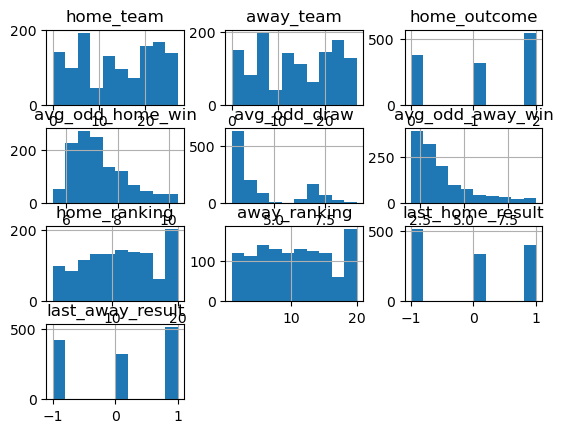

In [115]:
hist = df.hist()

In [116]:
df.describe

<bound method NDFrame.describe of             date  home_team  away_team  home_outcome  avg_odd_home_win  \
0     08/08/2015          2          1             0             7.024   
1     08/08/2015          6         22             1             6.697   
2     08/08/2015          8         24             1             6.842   
3     08/08/2015         12         21             2             7.000   
4     08/08/2015         15         23             2             6.477   
...          ...        ...        ...           ...               ...   
1241  12/05/2019         13         27             2             6.619   
1242  12/05/2019         15          5             0             6.563   
1243  12/05/2019         19         10             1             6.204   
1244  12/05/2019         23          8             1             6.153   
1245  12/05/2019         24         26             0             6.192   

      avg_odd_draw  avg_odd_away_win  home_ranking  away_ranking  \
0        

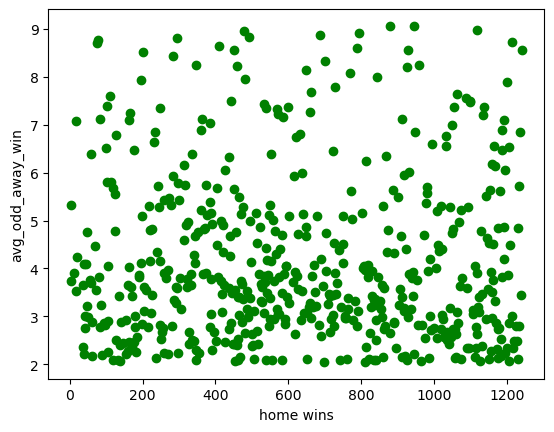

In [117]:
home_wins = df[df['home_outcome'] == 2]
plt.xlabel('home wins')
plt.ylabel('avg_odd_away_win')
plt.scatter(home_wins.index,home_wins['avg_odd_away_win'], color='green')
plt.show()

In [118]:
#independent
X = home_wins.index.values.reshape(-1,1)
#dependent
y = home_wins['avg_odd_away_win'].values.reshape(-1,1)

In [119]:
y

array([[3.742],
       [5.318],
       [3.912],
       [3.537],
       [7.071],
       [4.237],
       [3.666],
       [2.37 ],
       [2.227],
       [4.084],
       [3.003],
       [2.757],
       [4.091],
       [3.226],
       [4.761],
       [2.99 ],
       [3.758],
       [6.393],
       [3.688],
       [2.887],
       [2.172],
       [4.468],
       [3.544],
       [8.7  ],
       [8.755],
       [3.829],
       [2.779],
       [7.108],
       [3.234],
       [2.194],
       [2.858],
       [2.817],
       [6.504],
       [5.794],
       [7.384],
       [4.056],
       [2.902],
       [2.265],
       [7.6  ],
       [5.8  ],
       [2.091],
       [5.688],
       [4.786],
       [5.553],
       [2.515],
       [6.776],
       [2.085],
       [3.432],
       [2.062],
       [2.415],
       [2.882],
       [2.438],
       [2.219],
       [2.931],
       [3.647],
       [2.279],
       [2.47 ],
       [4.034],
       [7.098],
       [7.247],
       [3.621],
       [3.416],
       [

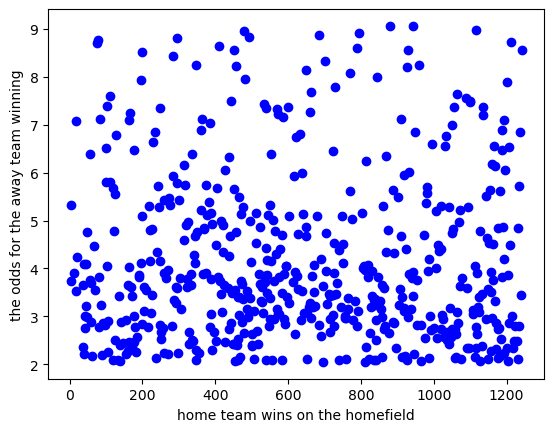

In [120]:
plt.ylabel('the odds for the away team winning')
plt.xlabel('home team wins on the homefield')
plt.scatter(X,y,color='blue')
plt.show()

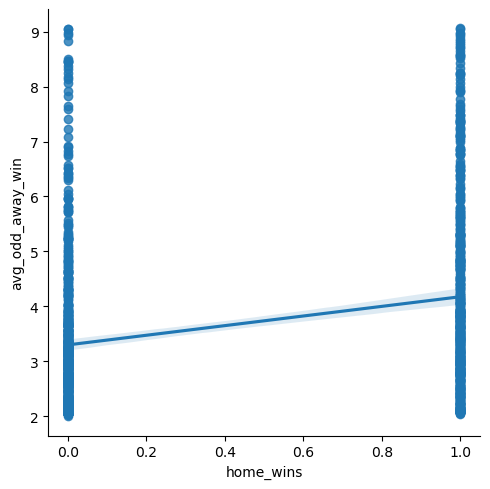

In [121]:
df['home_wins'] = (df['home_outcome'] == 2)
sns.lmplot(x='home_wins',y='avg_odd_away_win',data=df,fit_reg=True)

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.27)

In [123]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(397, 1)
(397, 1)
(148, 1)
(148, 1)


In [124]:
myreg = LinearRegression()


In [125]:
myreg.fit(X_train,y_train)
myreg

LinearRegression()

In [126]:
a = myreg.coef_
b = myreg.intercept_

In [127]:
a

array([[-1.48838064e-05]])

In [128]:
b

array([4.12517893])

In [129]:
print(f"the model is a line, y = a*x+b or y ={a}*x+{b}")

the model is a line, y = a*x+b or y =[[-1.48838064e-05]]*x+[4.12517893]


In [130]:
y_predicted = myreg.predict(X_test)

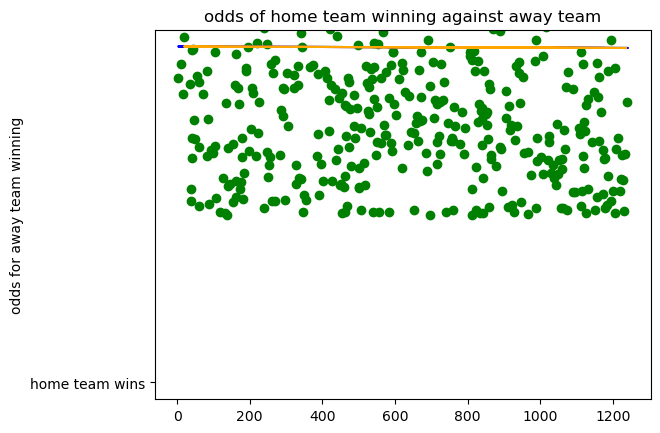

In [131]:
plt.title('odds of home team winning against away team')
plt.scatter(X,y,color='green')
plt.plot(X_train,a*X_train+b,color='blue')
plt.plot(X_test,y_predicted, color='orange')
plt.plot('home team wins')
plt.ylabel('odds for away team winning')
plt.show()

In [133]:
home_team_wins = myreg.predict([[200]])
home_team_wins

array([[4.12220217]])

In [134]:
home_team_match_number_won = 145
away_team_match_predicted = myreg.predict([[home_team_match_number_won]])
away_team_match_predicted

array([[4.12302077]])

In [136]:
from sklearn import metrics 
mae = metrics.mean_absolute_error(y_test,y_predicted)
print(mae)

1.558267774461907


In [137]:
mse = metrics.mean_squared_error(y_test,y_predicted)
print(mse)

3.7389554606119484


In [139]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_predicted))
print (rmse)

1.9336378824929834


In [140]:
eV = round(sm.explained_variance_score(y_test,y_predicted),2)
print("variant score",eV)

variant score 0.0


In [141]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

-0.013834874492048677

In [143]:
import joblib


In [144]:
model_file = 'data/footballfit.pkl'

In [145]:
joblib.dump(myreg,model_file)

['data/footballfit.pkl']

In [146]:
my_model = joblib.load(model_file)

In [147]:
y_predict = my_model.predict(X_test)

In [148]:
away_team_odds_prediction = my_model.predict([[100]])
print(away_team_odds_prediction)

[[4.12369055]]
